In [1]:
import pandas as pd
import numpy as np

In [2]:
from preprocessing import preprocess

In [3]:
joined = preprocess(5, 8, False)

In [4]:
joined

0  1  2  3  4  5  6  7  8  9  ... 32 33 34 35 36 37 38 39  \
0        A  A  A  A  A  A  A  G  G  C  ...  G  G  T  T  G  G  G  G   
1        A  A  A  A  A  A  A  G  G  G  ...  G  G  C  T  T  T  T  A   
2        A  A  A  A  A  A  A  G  G  T  ...  C  T  G  A  G  T  A  T   
3        A  A  A  A  A  A  A  T  G  G  ...  T  T  G  G  G  T  A  G   
4        A  A  A  A  A  A  C  G  G  G  ...  C  A  G  G  C  A  A  G   
...     .. .. .. .. .. .. .. .. .. ..  ... .. .. .. .. .. .. .. ..   
1611227  T  T  T  T  T  G  G  T  T  G  ...  G  G  G  T  G  G  G  G   
1611228  T  T  T  T  T  G  T  G  A  G  ...  T  G  G  C  G  T  G  G   
1611229  T  T  T  T  T  T  G  A  A  G  ...  T  T  G  G  C  T  T  A   
1611230  T  T  T  T  T  T  G  C  G  G  ...  C  C  G  G  T  G  A  G   
1611231  T  T  T  T  T  T  G  T  A  G  ...  G  A  A  T  A  G  T  C   

        occurrence_y      _merge  
0                  0   left_only  
1                  0   left_only  
2                  0   left_only  
3                  0   left_only  
4                  0   left_only  
...              ...         ...  
1611227            0   left_only  
1611228            0   left_only  
1611229            1  right_only  
1611230            0   left_only  
1611231            0   left_only  

[1611232 rows x 42 columns]

In [5]:
joined_matrix = [[[0] * 40 for i in range(4)] for n in range(len(joined))]
print(np.array(joined_matrix).shape)

(1611232, 4, 40)


In [6]:
joined.reset_index(inplace=True)

for index, row in joined.iterrows():
    x = 0
    for i in row:
        if (i == 'A'):
            joined_matrix[index][0][x] = 1
        elif (i == 'C'):
            joined_matrix[index][1][x] = 1
        elif (i == 'G'):
            joined_matrix[index][2][x] = 1
        elif (i == 'T'):
            joined_matrix[index][3][x] = 1
        else:
            continue
        x += 1

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(joined_matrix, joined.occurrence_y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42) 

In [8]:
num_samples, timesteps, features = np.asarray(x_train).shape
x_train_2d = np.asarray(x_train).reshape(num_samples, timesteps * features)

In [9]:
num_samples, timesteps, features = np.asarray(x_val).shape
x_val_2d = np.asarray(x_val).reshape(num_samples, timesteps * features)

In [10]:
num_samples, timesteps, features = np.asarray(x_test).shape
x_test_2d = np.asarray(x_test).reshape(num_samples, timesteps * features)

In [11]:
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
val = []
train = []
trees = range(69,71)
for tree in trees:
    rf = RandomForestClassifier(n_estimators=tree, random_state=42)
    rf.fit(x_train_2d, y_train)
    train.append(rf.score(x_train_2d, y_train))
    val.append(rf.score(x_val_2d, y_val))

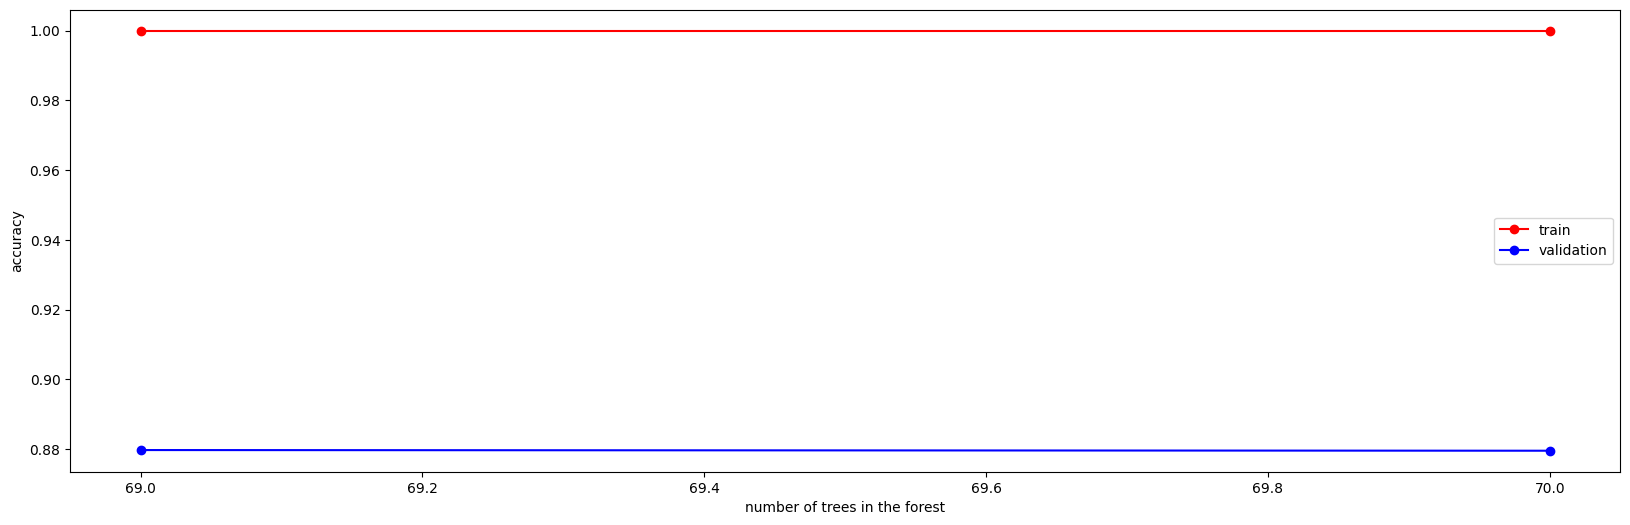

In [12]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,6))
plt.plot(trees, train,'or-')
plt.plot(trees, val,'ob-')
plt.xlabel('number of trees in the forest')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])

In [13]:
optimal = np.argmax(val) + 69
optimal

69

In [14]:
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=69, random_state=42)

In [15]:
rf.fit(x_train_2d, y_train)

RandomForestClassifier(n_estimators=69, random_state=42)

In [16]:
print(rf.score(x_test_2d, y_test))

0.8784534844389552


In [17]:
data = pd.read_csv('../data/new_test_data.csv')

In [18]:
matrix = [[[0] * 40 for i in range(4)] for n in range(len(data))]
print(np.array(matrix).shape)

(793, 4, 40)


In [19]:
data.reset_index(inplace=True)

for index, row in data.iterrows():
    x = 0
    for i in row:
        if (i == 'A'):
            matrix[index][0][x] = 1
        elif (i == 'C'):
            matrix[index][1][x] = 1
        elif (i == 'G'):
            matrix[index][2][x] = 1
        elif (i == 'T'):
            matrix[index][3][x] = 1
        else:
            continue
        x += 1

In [20]:
num_samples, timesteps, features = np.asarray(matrix).shape
matrix_2d = np.asarray(matrix).reshape(num_samples, timesteps * features)

In [21]:
prediction = rf.predict(matrix_2d)

In [22]:
from sklearn import metrics
matr = metrics.confusion_matrix(data.occurrence, prediction)
matr

array([[ 17,  47],
       [ 20, 709]])

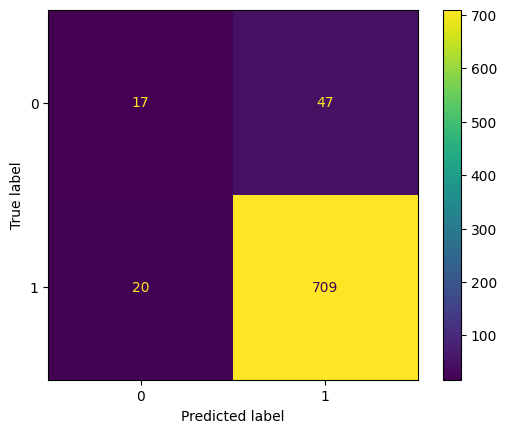

In [23]:
metrics.ConfusionMatrixDisplay.from_predictions(data.occurrence, prediction)

In [24]:
metrics.f1_score(1-data.occurrence, 1-prediction)

0.33663366336633666

In [25]:
data = pd.read_csv('../data/test_data.csv')

In [26]:
matrix = [[[0] * 40 for i in range(4)] for n in range(len(data))]

data.reset_index(inplace=True)

for index, row in data.iterrows():
    x = 0
    for i in row:
        if (i == 'A'):
            matrix[index][0][x] = 1
        elif (i == 'C'):
            matrix[index][1][x] = 1
        elif (i == 'G'):
            matrix[index][2][x] = 1
        elif (i == 'T'):
            matrix[index][3][x] = 1
        else:
            continue
        x += 1

In [27]:
num_samples, timesteps, features = np.asarray(matrix).shape
matrix_2d = np.asarray(matrix).reshape(num_samples, timesteps * features)

In [28]:
prediction = rf.predict(matrix_2d)
prediction

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [29]:
metrics.f1_score(1-data.occurrence, 1-prediction)

0.18181818181818182